## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neuron=[1024,512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, num in enumerate(num_neuron):
        if i == 0:
            x = keras.layers.Dense(units=num, activation='relu')(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=num, activation='relu')(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
EPOCHS = 100
LEARNING_RATE = 1e-4
BATCH_SIZE=256
MOMENTUM=0.95
SAVE=[True,False]

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from tensorflow.keras.callbacks import ModelCheckpoint

for save in SAVE:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE,momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    check_point = ModelCheckpoint(save_best_only=save,monitor='val_loss',filepath='model%s.h5' %str(save))
    model.fit(x_train,y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test,y_test),
          shuffle=True,
          callbacks=[check_point]
         )
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

Epoch 1/100
196/196 [==============================] - 2s 8ms/step - loss: 2.2894 - accuracy: 0.2508 - val_loss: 2.0677 - val_accuracy: 0.2456
Epoch 2/100
196/196 [==============================] - 2s 8ms/step - loss: 1.8473 - accuracy: 0.3630 - val_loss: 1.8096 - val_accuracy: 0.3633
Epoch 3/100
196/196 [==============================] - 2s 8ms/step - loss: 1.7121 - accuracy: 0.4055 - val_loss: 1.7517 - val_accuracy: 0.3878
Epoch 4/100
196/196 [==============================] - 2s 8ms/step - loss: 1.6271 - accuracy: 0.4352 - val_loss: 1.7153 - val_accuracy: 0.3996
Epoch 5/100
196/196 [==============================] - 2s 8ms/step - loss: 1.5649 - accuracy: 0.4544 - val_loss: 1.6787 - val_accuracy: 0.4094
Epoch 6/100
196/196 [==============================] - 2s 8ms/step - loss: 1.5129 - accuracy: 0.4728 - val_loss: 1.6460 - val_accuracy: 0.4260
Epoch 7/100
196/196 [==============================] - 2s 8ms/step - loss: 1.4650 - accuracy: 0.4895 - val_loss: 1.6334 - val_accuracy: 0.4253

313/313 [==============================] - 0s 2ms/step - loss: 1.5224 - accuracy: 0.4778


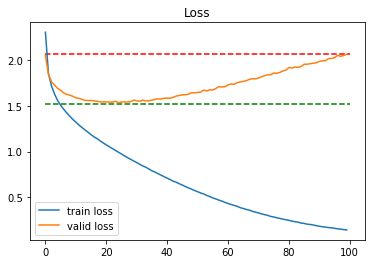

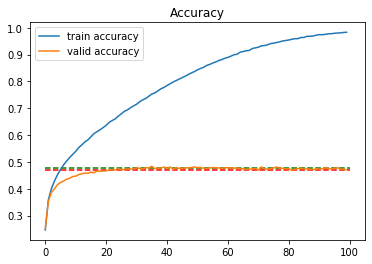

In [11]:
#save best(green) or not(red)
model = keras.models.load_model("modelFalse.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

model_best = keras.models.load_model("modelTrue.h5")
loss_loadback_best, acc_loadback_best = model_best.evaluate(x_test, y_test)


import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.hlines(y=loss_loadback_best, xmin=0, xmax=len(train_loss), colors='g', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.hlines(y=acc_loadback_best, xmin=0, xmax=len(train_loss), colors='g', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

In [14]:
model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE,momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
check_point = ModelCheckpoint(save_best_only=True,save_weights_only=True,monitor='val_loss',filepath='model%s.h5' %str('weight'))
model.fit(x_train,y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test,y_test),
          shuffle=True,
          callbacks=[check_point]
         )
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


Epoch 1/100
196/196 [==============================] - 1s 7ms/step - loss: 2.2469 - accuracy: 0.2632 - val_loss: 2.0191 - val_accuracy: 0.2768
Epoch 2/100
196/196 [==============================] - 1s 7ms/step - loss: 1.8408 - accuracy: 0.3675 - val_loss: 1.7981 - val_accuracy: 0.3688
Epoch 3/100
196/196 [==============================] - 1s 7ms/step - loss: 1.7056 - accuracy: 0.4081 - val_loss: 1.7455 - val_accuracy: 0.3876
Epoch 4/100
196/196 [==============================] - 1s 7ms/step - loss: 1.6199 - accuracy: 0.4353 - val_loss: 1.7054 - val_accuracy: 0.4068
Epoch 5/100
196/196 [==============================] - 2s 8ms/step - loss: 1.5578 - accuracy: 0.4557 - val_loss: 1.6832 - val_accuracy: 0.4127
Epoch 6/100
196/196 [==============================] - 2s 8ms/step - loss: 1.5045 - accuracy: 0.4730 - val_loss: 1.6526 - val_accuracy: 0.4193
Epoch 7/100
196/196 [==============================] - 1s 7ms/step - loss: 1.4621 - accuracy: 0.4890 - val_loss: 1.6361 - val_accuracy: 0.4266

313/313 [==============================] - 0s 1ms/step - loss: 1.5201 - accuracy: 0.4759


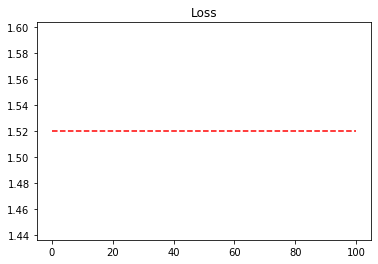

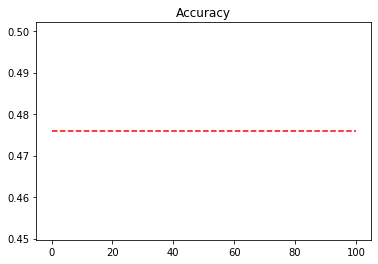

In [40]:
# save weights
model = build_mlp(input_shape=x_train.shape[1:])
model.load_weights("modelweight.h5")
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.hlines(y=loss_loadback, xmin=0, xmax=100, colors='r', linestyles='--')
plt.title("Loss")
plt.show()

plt.hlines(y=acc_loadback, xmin=0, xmax=100, colors='r', linestyles='--')
plt.title("Accuracy")
plt.show()

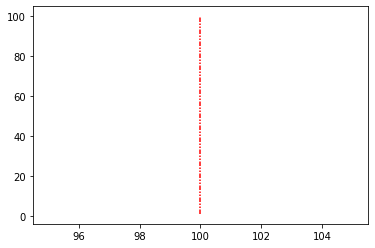

In [7]:
import matplotlib.pyplot as plt
plt.vlines(ymin=1, ymax=100, x= 100, colors='r', linestyles=(0, (3, 1, 1, 1, 1, 1)))